In [1]:
import pandas as pd
import numpy as np
import math
from numpy import nan
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

In [3]:
def split_dataset(data):
    train=data[31:-7846]
    test=data[-7846:-118]
    train = np.array(np.split(train, len(train)/(24)))
    test = np.array(np.split(test, len(test)/(24)))
    return train, test

In [4]:
def anchored_walk_forward(func,train,test):
    forecast_step=23
    #list with weekly data
    history = [x for x in train]
    #walk-forward validation over data
    predictions = list()
    for i in range(len(test)):
        yhat_sequence = func(history,forecast_step)
        predictions.append(yhat_sequence)
        history.append(test[i, :])
    predictions = np.array(predictions)
    score = evaluate_forecast(test[:, :, 0], predictions)
    return score

In [5]:
def evaluate_forecast(real,forecasted):
    s = 0
    for row in range(real.shape[0]):
        for col in range(real.shape[1]):
            s += (real[row, col] - forecasted[row, col])**2
    score = math.sqrt(s / (real.shape[0] * real.shape[1]))
    return score
 

In [6]:
def arima_forecast(data,step_forecast):
    series=[day[:, 0] for day in data]
    series=np.array(series).flatten()
    model = ARIMA(series, order=(4,24,6))
    model_fit = model.fit()
    output = model_fit.predict(len(series), len(series)+step_forecast)
    return output

In [7]:
power_consumption=pd.read_csv('C:\\Users\\Amin y Lubna\\Desktop\\Escritorio Virtual\\Carrera Amin\\1.TFG\\household_power_consumption.csv',sep=';',low_memory=False,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
power_consumption=power_consumption[['Global_active_power']]
power_consumption.replace('?', nan, inplace=True)
power_consumption['Global_active_power'] = power_consumption['Global_active_power'].astype(float)
fill_missing(power_consumption.values)
power_consumption['Global_active_power'] = power_consumption['Global_active_power'].apply(lambda x: x/60)
power_consumption=power_consumption.resample('h').sum()
power_consumption.rename(columns={"Global_active_power":"Active_Energy"},inplace=True)



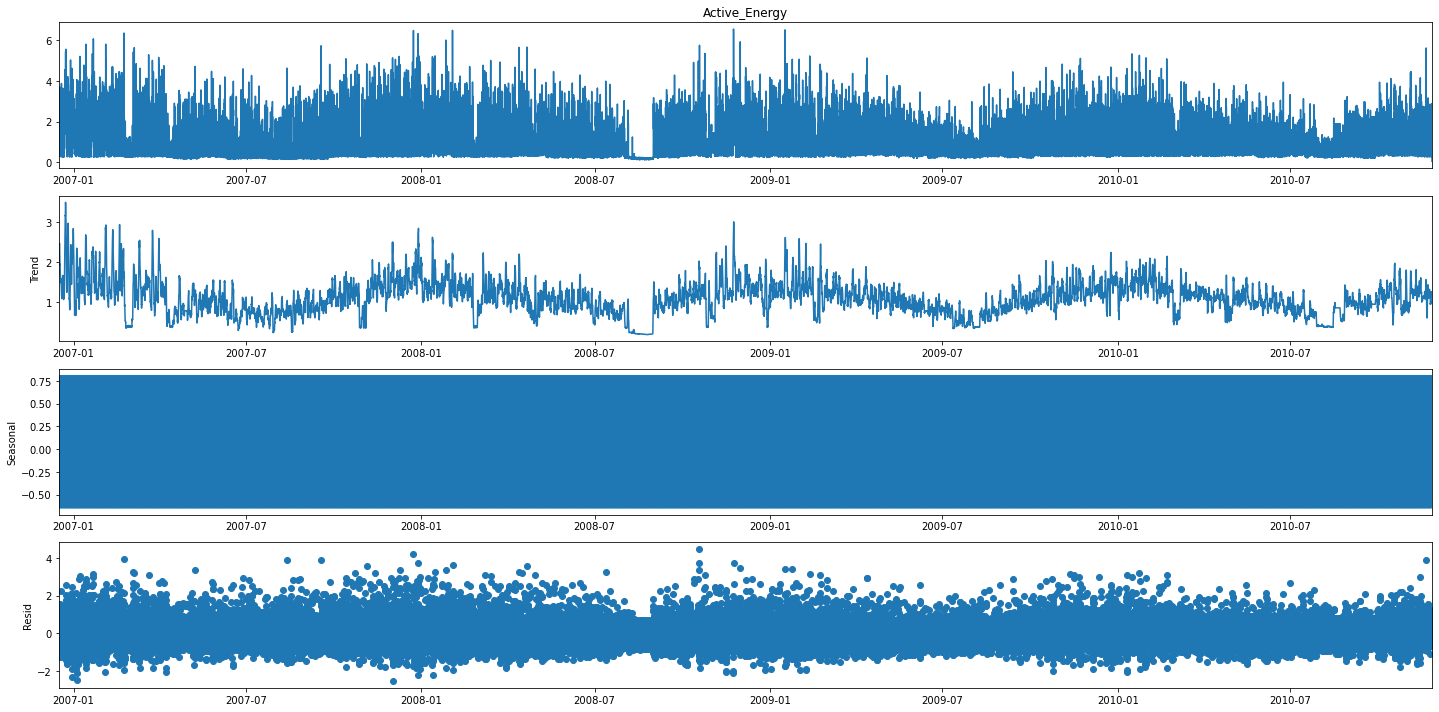

In [8]:
result = seasonal_decompose(power_consumption['Active_Energy'], model='additive')
result.plot()
pyplot.show()

# Checking for stacionality


<AxesSubplot:xlabel='datetime', ylabel='Active_Energy'>

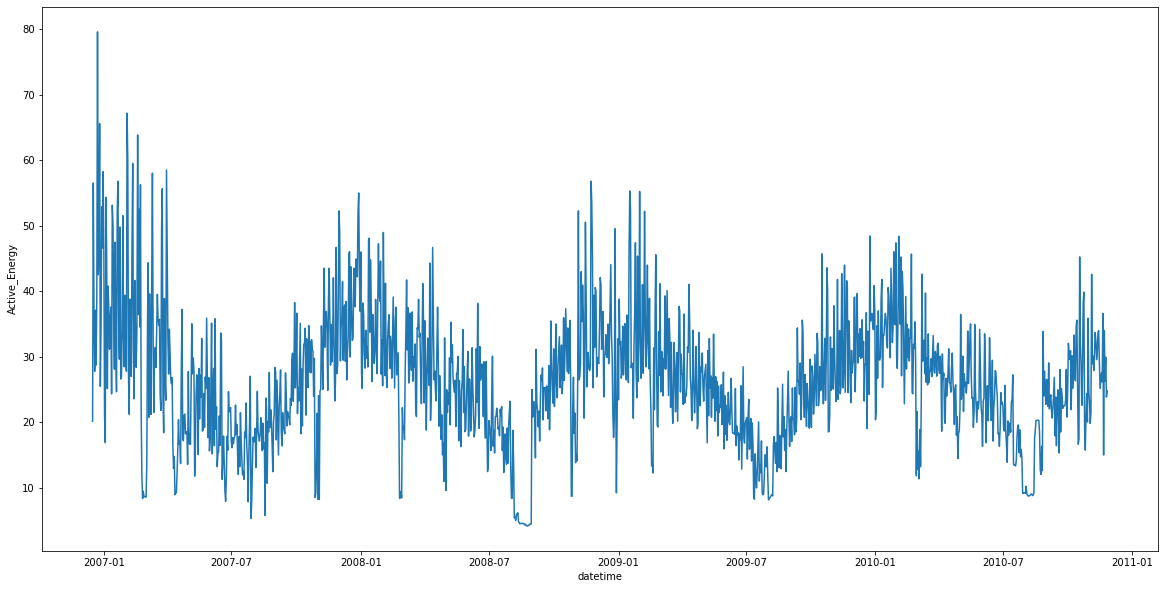

In [9]:
df_by_day=power_consumption.resample('D').sum()
sns.lineplot(x=df_by_day.index,y='Active_Energy',data=df_by_day)

<AxesSubplot:xlabel='datetime', ylabel='Active_Energy'>

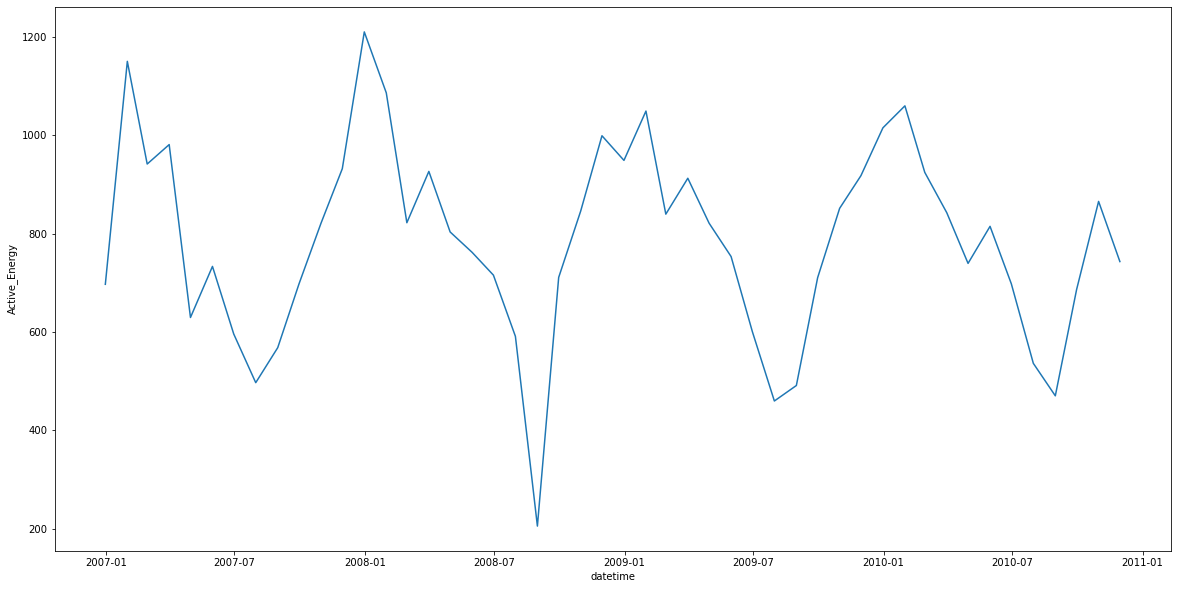

In [10]:
df_by_day=power_consumption.resample('M').sum()
sns.lineplot(x=df_by_day.index,y='Active_Energy',data=df_by_day)

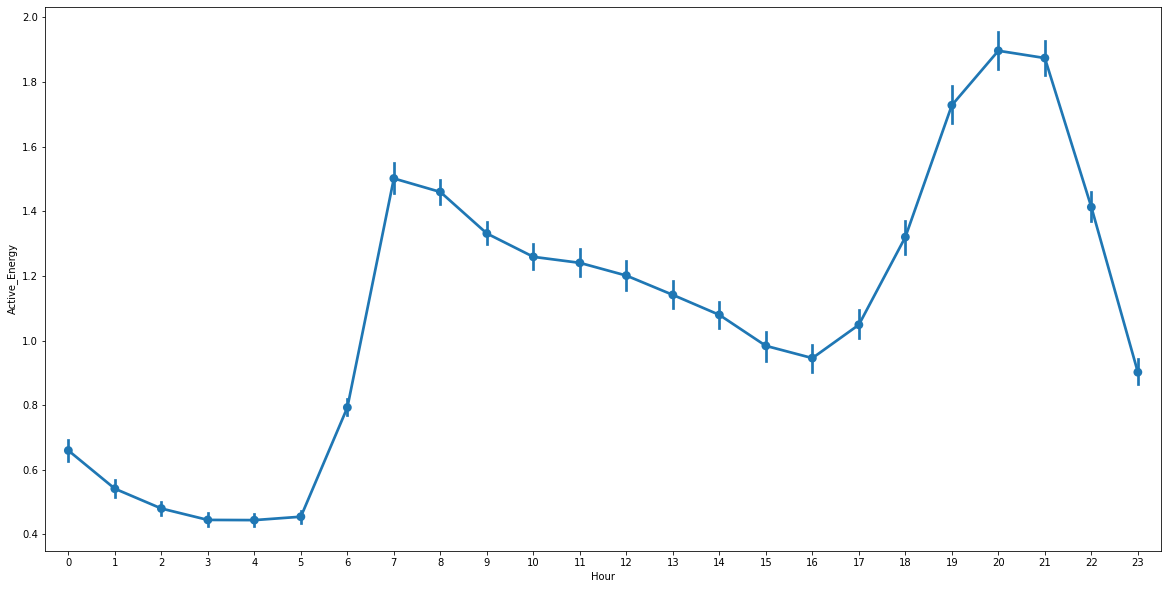

In [11]:
plot_for_power_consumption=power_consumption
plot_for_power_consumption['Hour']=plot_for_power_consumption.index.hour
plot_for_power_consumption['Month']=plot_for_power_consumption.index.month
sns.pointplot(data=plot_for_power_consumption,x='Hour',y='Active_Energy')
pyplot.savefig('hourly.jpg')

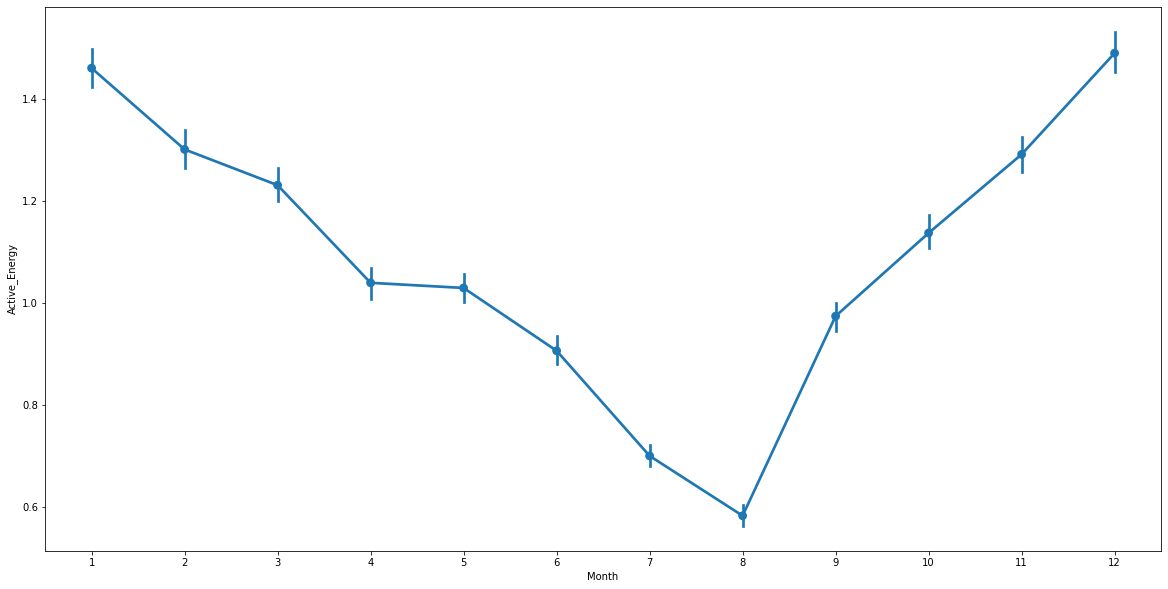

In [12]:
sns.pointplot(data=plot_for_power_consumption,x='Month',y='Active_Energy')
pyplot.savefig('monthly.jpg')

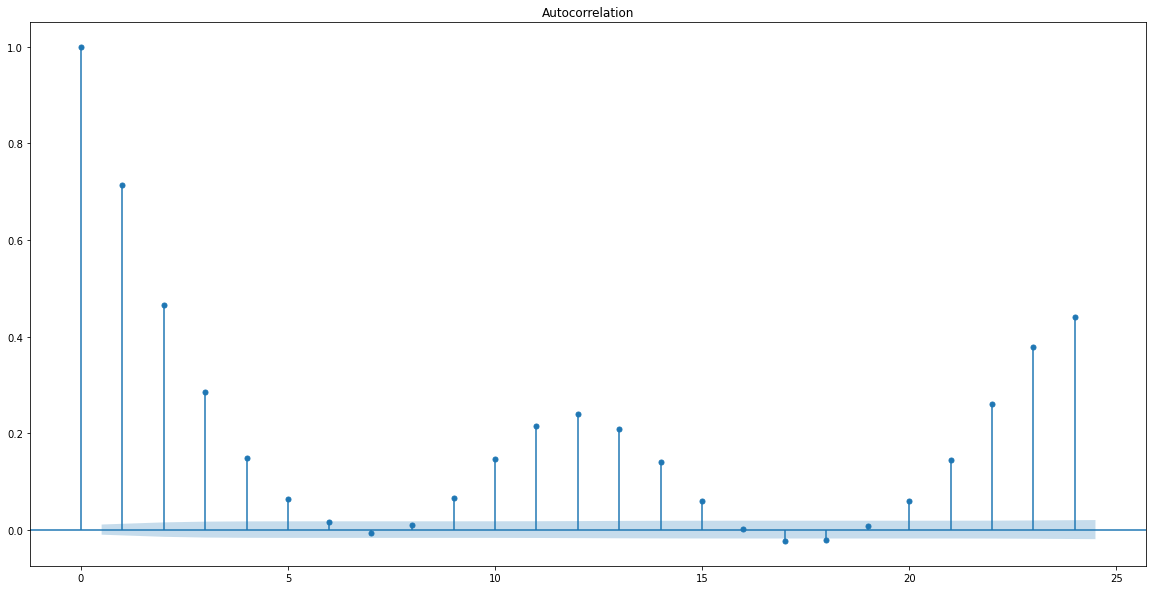

In [13]:
lag=24
plot_acf(power_consumption['Active_Energy'],lags=lag )
pyplot.savefig('acf.jpg')

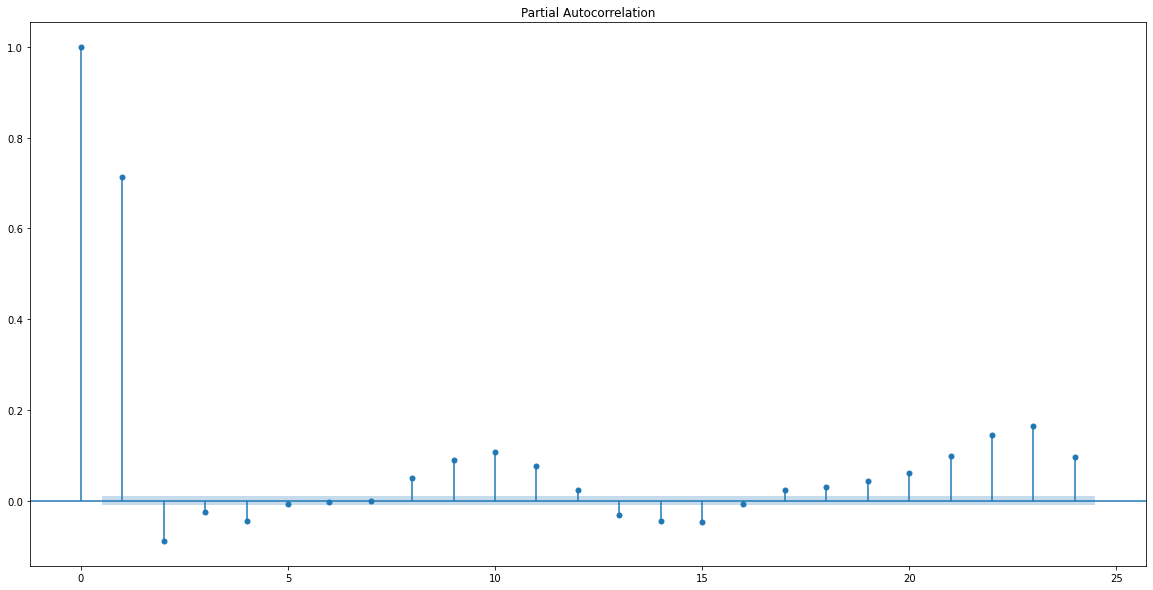

In [14]:
plot_pacf(power_consumption['Active_Energy'],lags=lag )
pyplot.savefig('PACF.jpg')

In [15]:
result = adfuller(power_consumption['Active_Energy'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -14.279731281927612
p-value: 1.3303299942732509e-26
Critial Values:
   1%, -3.4305393559398922
Critial Values:
   5%, -2.8616236906108443
Critial Values:
   10%, -2.566814545887977


# Building the model


In [16]:
train,test=split_dataset(power_consumption)


In [ ]:
def lstm_forecast():
    print('Todo se solucionaría si trabajases más')
    print('Sabes que es verdad')
    print('Estas aletargado, te rallas la cabeza y no trabajas')
    print('Al no trabajar, no solucionas los problemas')
    print('Te rallas más, y trabajas menos aun')
    print('Trabaja ahora que todavia tiene tiempo')

In [ ]:
models=dict()
models['Arima']=arima_forecast
models['Lstm']=lstm_forecast

In [ ]:
anchored_walk_forward(arima_forecast,train,test)

C:\Users\Amin y Lubna\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [17]:
prueba=arima_forecast(train,23)

C:\Users\Amin y Lubna\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<function matplotlib.pyplot.legend(*args, **kwargs)>

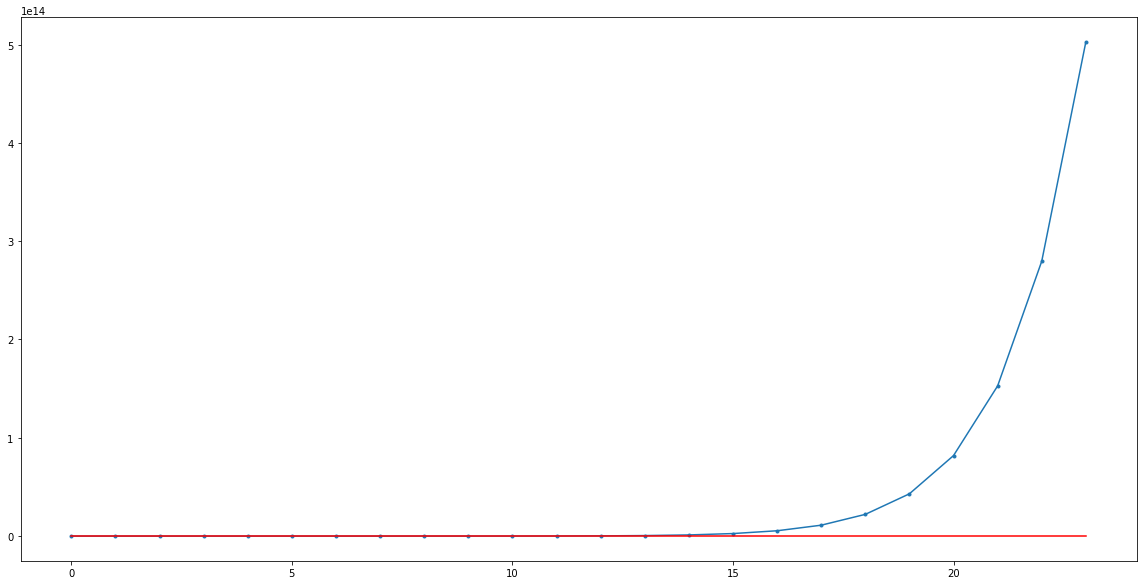

In [18]:
plt.pyplot.plot(prueba.flatten(),marker='.',label='Reales')
plt.pyplot.plot(test[0,:,0].flatten(),'r',label='Prediccion')
plt.pyplot.legend

In [592]:
test[0,:]

array([[ 0.3997    ,  0.        ,  1.        ],
       [ 0.3741    ,  1.        ,  1.        ],
       [ 0.35483333,  2.        ,  1.        ],
       [ 0.901     ,  3.        ,  1.        ],
       [ 0.39066667,  4.        ,  1.        ],
       [ 0.3498    ,  5.        ,  1.        ],
       [ 0.97383333,  6.        ,  1.        ],
       [ 2.6496    ,  7.        ,  1.        ],
       [ 1.47953333,  8.        ,  1.        ],
       [ 1.4785    ,  9.        ,  1.        ],
       [ 1.47666667, 10.        ,  1.        ],
       [ 1.485     , 11.        ,  1.        ],
       [ 1.28223333, 12.        ,  1.        ],
       [ 0.3536    , 13.        ,  1.        ],
       [ 0.4044    , 14.        ,  1.        ],
       [ 0.37503333, 15.        ,  1.        ],
       [ 0.35773333, 16.        ,  1.        ],
       [ 0.77203333, 17.        ,  1.        ],
       [ 1.65236667, 18.        ,  1.        ],
       [ 2.4833    , 19.        ,  1.        ],
       [ 1.93313333, 20.        ,  1.   

In [605]:
result = adfuller(power_consumption['Active_Energy'],maxlag=8760)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

MemoryError: Unable to allocate 68.4 MiB for an array with shape (25828, 347) and data type float64